In [1]:
import pickle

from sklearn.model_selection import train_test_split
from wbn.classifier import WBN
from wbn.object import Document, DocumentData, Documents

In [2]:
# Load dataset
with open("../data/pr-newswire.pickle", "rb") as infile:
    raw_data = pickle.load(infile)

# De-structure 'data' and 'target'
data = raw_data.get("data")
target = raw_data.get("target")

# Construct Document's for each data/target entry
pr_newswire = Documents(
    [
        Document(DocumentData(paragraphs, keywords), target[idx])
        for idx, (paragraphs, keywords) in enumerate(data)
    ]
)

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(
    pr_newswire.data, pr_newswire.target, test_size=0.2
)

In [3]:
# Build WBN
wbn = WBN()

# Fit WBN Model
wbn.fit(x_train, y_train)

[Classification(dag=<networkx.classes.digraph.DiGraph object at 0x10f2106a0>, cls='equity-offering', corpus=['market', 'proce', 'initi', 'issu', 'regist', 'commenc', 'public', 'unit', 'separ', 'placement', 'agre', 'bookrunn', 'negoti', 'secur', 'price', 'trade', 'oversubscrib', 'privat', 'intent', 'applic', 'equiti', 'announc', 'approv', 'transact', 'underwritten', 'list', 'total', 'global', 'newli', 'ipo', 'ordinari', 'exercis', 'rais', 'addit', 'size', 'class', 'rang', 'definit', 'prospectu', 'intend', 'alloc', 'file', 'registr', 'purchas', 'secondari', 'exchang', 'preliminari', 'today', 'anticip', 'result', 'offer', 'issuanc', 'financ', 'elect', 'settlement', 'close', 'success', 'stock', 'expect', 'solicit', 'sell', 'propos', 'statement', 'consumm', 'upsiz', 'sold', 'share', 'underwrit', 'runner', 'allot', 'base', 'complet', 'book', 'final', 'continu', 'relat', 'offici', 'effect', 'launch', 'term', 'busi', 'accomplish', 'combin']),
 Classification(dag=<networkx.classes.digraph.DiGra

In [4]:
# Predict
pred = wbn.predict(x_test)

# Reverse encode classes
y_pred = wbn.reverse_encode(target=pred)

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    recall_score,
    precision_score,
)

In [6]:
c_matrix = confusion_matrix(y_test, y_pred)

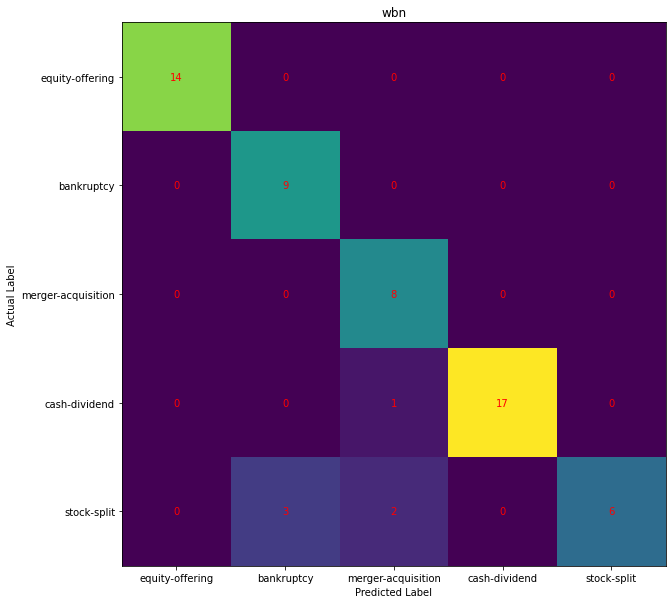

In [7]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(c_matrix)

ax.set_ylabel("Actual Label")
ax.set_xlabel("Predicted Label")
labels = tuple(wbn.reverse_encode([0, 1, 2, 3, 4]))
ax.xaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=labels)
ax.yaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=labels)
plt.title("wbn")
for i in range(len(labels)):  # ref: (https://realpython.com/logistic-regression-python/)
    for j in range(len(labels)):
        ax.text(j, i, c_matrix[i, j], ha='center', va='center', color='red')
plt.savefig("wbn")

In [8]:
# Calculate key metrics
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1 Score: {f1}")

Precision Score: 0.9261363636363636
Recall Score: 0.9
F1 Score: 0.8950257997936016


In [9]:
# Classification Report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

        bankruptcy       1.00      1.00      1.00        14
     cash-dividend       0.75      1.00      0.86         9
   equity-offering       0.73      1.00      0.84         8
merger-acquisition       1.00      0.94      0.97        18
       stock-split       1.00      0.55      0.71        11

          accuracy                           0.90        60
         macro avg       0.90      0.90      0.88        60
      weighted avg       0.93      0.90      0.90        60



In [10]:
# Load Sample Predicition
wbn.predictions[0]

ClassificationScore(cls=1, probability=0.02082196035793421, edges=((<11:0.1549:[49:2]>, <chapter:0.1559:[50:1]>, 2.25741549361104), (<bankruptci:0.1395:[48:3]>, <chapter:0.1559:[50:1]>, 2.2153451524864884), (<bankruptci:0.1395:[48:3]>, <11:0.1549:[49:2]>, 2.1899814275650313), (<chapter:0.1559:[50:1]>, <file:0.0472:[33:18]>, 1.7678634905251887), (<11:0.1549:[49:2]>, <file:0.0472:[33:18]>, 1.7518385133316197), (<bankruptci:0.1395:[48:3]>, <file:0.0472:[33:18]>, 1.7266836596757278), (<chapter:0.1559:[50:1]>, <reorgan:0.0451:[28:23]>, 1.6502442973811973), (<11:0.1549:[49:2]>, <reorgan:0.0451:[28:23]>, 1.6366739816097637), (<bankruptci:0.1395:[48:3]>, <reorgan:0.0451:[28:23]>, 1.6153722784515439), (<chapter:0.1559:[50:1]>, <plan:0.0451:[26:25]>, 1.6037982761396832), (<11:0.1549:[49:2]>, <plan:0.0451:[26:25]>, 1.5911972686376377), (<bankruptci:0.1395:[48:3]>, <plan:0.0451:[26:25]>, 1.571417115705005), (<chapter:0.1559:[50:1]>, <announc:0.0277:[23:28]>, 1.5252183540392217)))

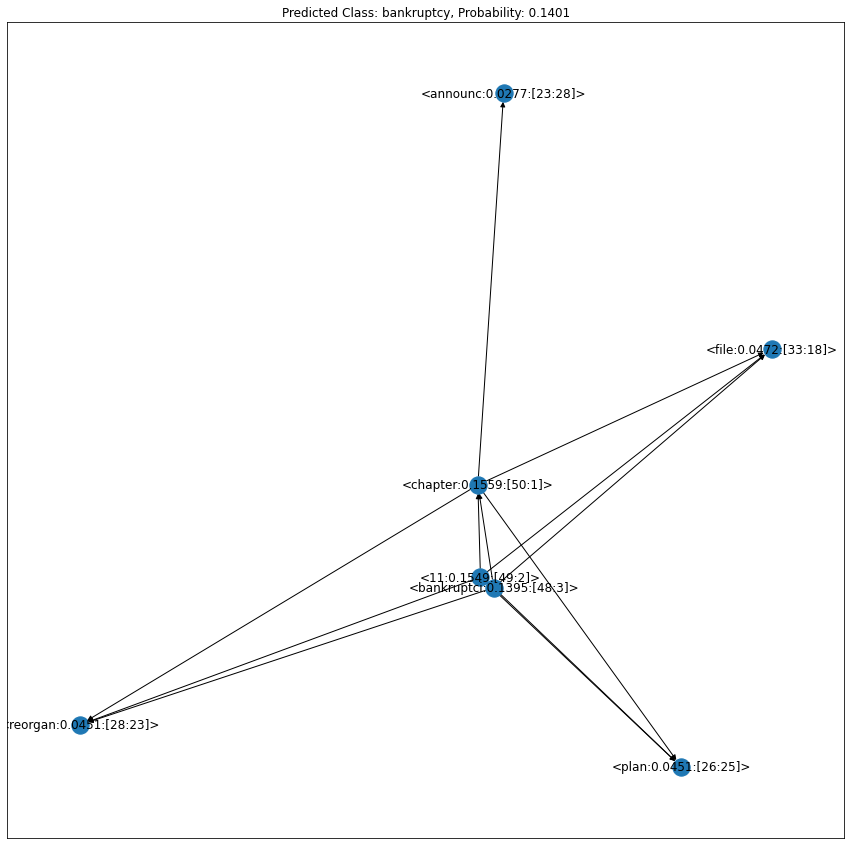

In [11]:
import networkx as nx

# Make figsize
plt.figure(figsize=(15,15))

# Bulid Graph
graph = nx.DiGraph()
graph.add_weighted_edges_from(list(wbn.predictions[0].edges))
nx.draw_networkx(graph)

# Extract Metadata
predicted_class = wbn.reverse_encode([wbn.predictions[0].cls])[0]
plt.title(
    f"Predicted Class: {predicted_class}, "
    f"Probability: {round(wbn.predictions[1].probability, 5)}"
)
plt.draw()
plt.savefig("predicition-graph-1")

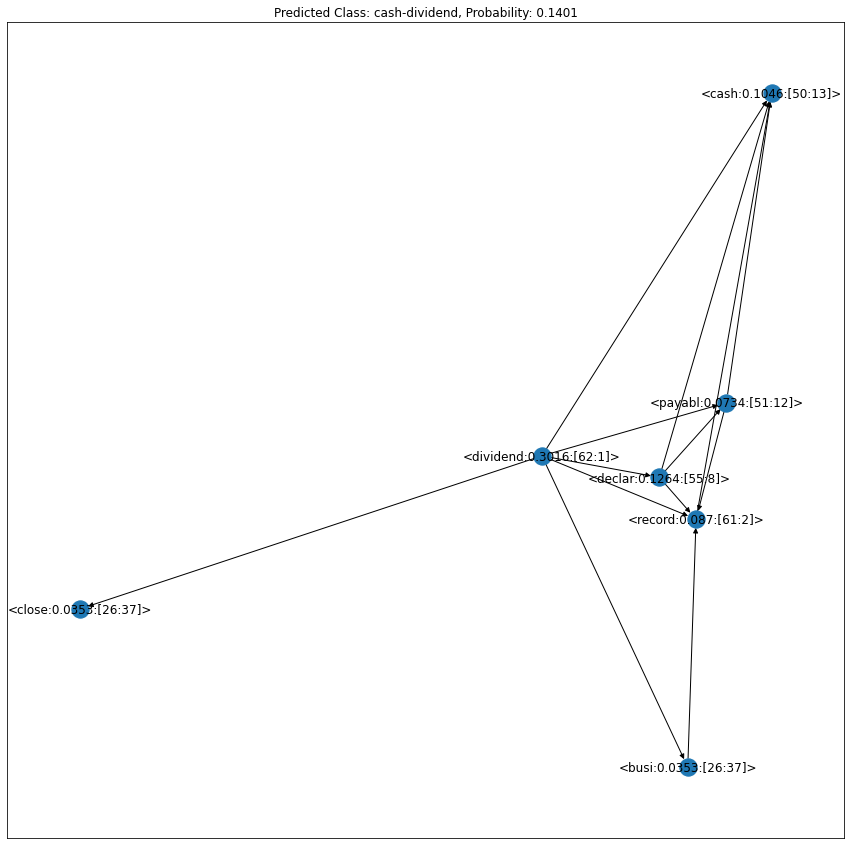

In [12]:
# Make figsize
plt.figure(figsize=(15,15))

# Bulid Graph
graph = nx.DiGraph()
graph.add_weighted_edges_from(list(wbn.predictions[1].edges))
nx.draw_networkx(graph)

# Extract Metadata
predicted_class = wbn.reverse_encode([wbn.predictions[1].cls])[0]
plt.title(
    f"Predicted Class: {predicted_class}, "
    f"Probability: {round(wbn.predictions[1].probability, 5)}"
)
plt.draw()
plt.savefig("predicition-graph-2")